# Regresion Basica: Predecir eficiencia de gasolina

Este ejercicio usa el set de datos clásico [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) y construye un modelo para predecir el consumo de vehículos de 1970 y 1980. Para hacer esto proveeremos el modelo con una descripción de muchos automóviles de ese periodo. Esta descripción incluye atributos como: Cilindros, desplazamiento, potencia y peso.

El objetivo de este ejercicio es predecir el target miles per galón (MPG), que vendría a representar las millas por galón de combustible.

Este ejemplo usa el API `tf.keras` , revise [Esta Guía](https://www.tensorflow.org/guide/keras) para obtener mas detalles.

## El set de Datos de MPG

El set de datos esta disponible de el siguiente repositorio [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/).

### Obtenga los datos
Primero descargue el set de datos.

```py
keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
```

In [24]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: ucimlrepo in c:\users\rodri\appdata\local\programs\python\python312\lib\site-packages (0.0.7)




[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Importelo usando pandas.

In [4]:
column_names = ["MPG", "Cylinders", "Displacement", "Horsepower", "Weight", "Acceleration", "Model Year", "Origin", "Car name"]

In [151]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 

In [152]:
# Extraer los datos y los nombres de las características
data = auto_mpg.get('data', None)
variables = auto_mpg.get('variables', None) 

data # Datos 

{'ids':                       car_name
 0    chevrolet,chevelle,malibu
 1            buick,skylark,320
 2           plymouth,satellite
 3                amc,rebel,sst
 4                  ford,torino
 ..                         ...
 393            ford,mustang,gl
 394                  vw,pickup
 395              dodge,rampage
 396                ford,ranger
 397                 chevy,s-10
 
 [398 rows x 1 columns],
 'features':      displacement  cylinders  horsepower  weight  acceleration  model_year  \
 0           307.0          8       130.0    3504          12.0          70   
 1           350.0          8       165.0    3693          11.5          70   
 2           318.0          8       150.0    3436          11.0          70   
 3           304.0          8       150.0    3433          12.0          70   
 4           302.0          8       140.0    3449          10.5          70   
 ..            ...        ...         ...     ...           ...         ...   
 393         140.

In [153]:
variables # Nombre y caracteristicas de los datos 

,name,role,type,demographic,description,units,missing_values
0,displacement,Feature,Continuous,None,None,None,no
1,mpg,Target,Continuous,None,None,None,no
2,cylinders,Feature,Integer,None,None,None,no
3,horsepower,Feature,Continuous,None,None,None,yes
4,weight,Feature,Continuous,None,None,None,no
5,acceleration,Feature,Continuous,None,None,None,no
6,model_year,Feature,Integer,None,None,None,no
7,origin,Feature,Integer,None,None,None,no
8,car_name,ID,Categorical,None,None,None,no


In [154]:
# Extraer las características y los objetivos
X = auto_mpg.data.features 
y = auto_mpg.data.targets 

In [155]:
X 

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...
393,140.0,4,86.0,2790,15.6,82,1
394,97.0,4,52.0,2130,24.6,82,2
395,135.0,4,84.0,2295,11.6,82,1
396,120.0,4,79.0,2625,18.6,82,1


In [156]:
y 

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


### Limpia los datos

Trata los missings y variables categóricas

In [157]:
# Convertir a DataFrame para facilitar el manejo
df_X = pd.DataFrame(X, columns=auto_mpg.variables[auto_mpg.variables.role == 'Feature']['name'])
df_y = pd.DataFrame(y, columns=auto_mpg.variables[auto_mpg.variables.role == 'Target']['name'])

# Unir las características y los objetivos en un solo DataFrame
df = pd.concat([df_X, df_y], axis=1)

# Mostrar los primeros registros del DataFrame
print(df.head()) 

name  displacement  cylinders  horsepower  weight  acceleration  model_year  \
0            307.0          8       130.0    3504          12.0          70   
1            350.0          8       165.0    3693          11.5          70   
2            318.0          8       150.0    3436          11.0          70   
3            304.0          8       150.0    3433          12.0          70   
4            302.0          8       140.0    3449          10.5          70   

name  origin   mpg  
0          1  18.0  
1          1  15.0  
2          1  18.0  
3          1  16.0  
4          1  17.0  


In [158]:
# Tratar valores faltantes
print("Valores faltantes por columna antes del tratamiento:\n", df.isnull().sum()) 

Valores faltantes por columna antes del tratamiento:
 name
displacement    0
cylinders       0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
mpg             0
dtype: int64


In [159]:
# Imputar los valores faltantes (usando la mediana para las variables continuas)
df.fillna(df.median(), inplace=True)

In [160]:
print("Valores faltantes por columna antes del tratamiento:\n", df.isnull().sum()) 

Valores faltantes por columna antes del tratamiento:
 name
displacement    0
cylinders       0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
mpg             0
dtype: int64


In [69]:
# Tratar variables categóricas 

In [161]:
# Identificar variables categóricas
categorical_columns = df.select_dtypes(include=['object']).columns 
categorical_columns 

Index([], dtype='object', name='name')

In [162]:
# Convertir variables categóricas usando one-hot encoding
df = pd.get_dummies(df, columns=categorical_columns) 
df 

name,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
0,307.0,8,130.0,3504,12.0,70,1,18.0
1,350.0,8,165.0,3693,11.5,70,1,15.0
2,318.0,8,150.0,3436,11.0,70,1,18.0
3,304.0,8,150.0,3433,12.0,70,1,16.0
4,302.0,8,140.0,3449,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...
393,140.0,4,86.0,2790,15.6,82,1,27.0
394,97.0,4,52.0,2130,24.6,82,2,44.0
395,135.0,4,84.0,2295,11.6,82,1,32.0
396,120.0,4,79.0,2625,18.6,82,1,28.0


In [163]:
print("Primeros registros después del tratamiento:\n", df.head()) 

Primeros registros después del tratamiento:
 name  displacement  cylinders  horsepower  weight  acceleration  model_year  \
0            307.0          8       130.0    3504          12.0          70   
1            350.0          8       165.0    3693          11.5          70   
2            318.0          8       150.0    3436          11.0          70   
3            304.0          8       150.0    3433          12.0          70   
4            302.0          8       140.0    3449          10.5          70   

name  origin   mpg  
0          1  18.0  
1          1  15.0  
2          1  18.0  
3          1  16.0  
4          1  17.0  


### Divide los datos en train y test

Ahora divida el set de datos en un set de entrenamiento y otro de pruebas. 80% para entrenamiento

Usaremos el set de pruebas en la evaluacion final de nuestro modelo.

NOTA: El resultado tienen que ser dos datasets 

In [164]:
# Dividir el DataFrame en variables (X) y objetivo (y)
X = df.drop(columns=auto_mpg.variables[auto_mpg.variables.role == 'Target']['name'].values)
y = df[auto_mpg.variables[auto_mpg.variables.role == 'Target']['name'].values]

In [165]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Unir los conjuntos de entrenamiento y prueba en DataFrames separados
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1) 

In [166]:
# Mostrar las primeras filas de los conjuntos de datos
print("Primeras filas del conjunto de entrenamiento:\n", df_train.head())

Primeras filas del conjunto de entrenamiento:
 name  displacement  cylinders  horsepower  weight  acceleration  model_year  \
3            304.0          8       150.0    3433          12.0          70   
18            97.0          4        88.0    2130          14.5          70   
376           91.0          4        68.0    2025          18.2          82   
248           91.0          4        60.0    1800          16.4          78   
177          115.0          4        95.0    2694          15.0          75   

name  origin   mpg  
3          1  16.0  
18         3  27.0  
376        3  37.0  
248        3  36.1  
177        2  23.0  


In [167]:
# Mostrar las primeras filas de los conjuntos de datos
print("Primeras filas del conjunto de prueba:\n", df_test.head()) 

Primeras filas del conjunto de prueba:
 name  displacement  cylinders  horsepower  weight  acceleration  model_year  \
198           91.0          4        53.0    1795          17.4          76   
396          120.0          4        79.0    2625          18.6          82   
33           232.0          6       100.0    2634          13.0          71   
208          318.0          8       150.0    3940          13.2          76   
93           318.0          8       150.0    4237          14.5          73   

name  origin   mpg  
198        3  33.0  
396        1  28.0  
33         1  19.0  
208        1  13.0  
93         1  14.0  


In [168]:
# Guardar los conjuntos de datos en archivos CSV
df_train.to_csv('df_train.csv', index=False)
df_test.to_csv('df_test.csv', index=False)

### Inspecciona los datos

Revise rapidamente la distribucion conjunta del dataset de entrenamiento mediante un grid de gráficos

In [169]:
import seaborn as sns 
import matplotlib.pyplot as plt

# Cargar el conjunto de datos de entrenamiento
df_train = pd.read_csv('df_train.csv') 

In [170]:
# Crear un grid de gráficos de dispersión para las características del dataset de entrenamiento
# Se excluye la columna de la variable objetivo si es necesario, ajusta según el nombre real
feature_columns = df_train.columns[df_train.columns != 'mpg']  # Reemplaza 'mpg' con el nombre real si es diferente 
feature_columns

Index(['displacement', 'cylinders', 'horsepower', 'weight', 'acceleration',
       'model_year', 'origin'],
      dtype='object')

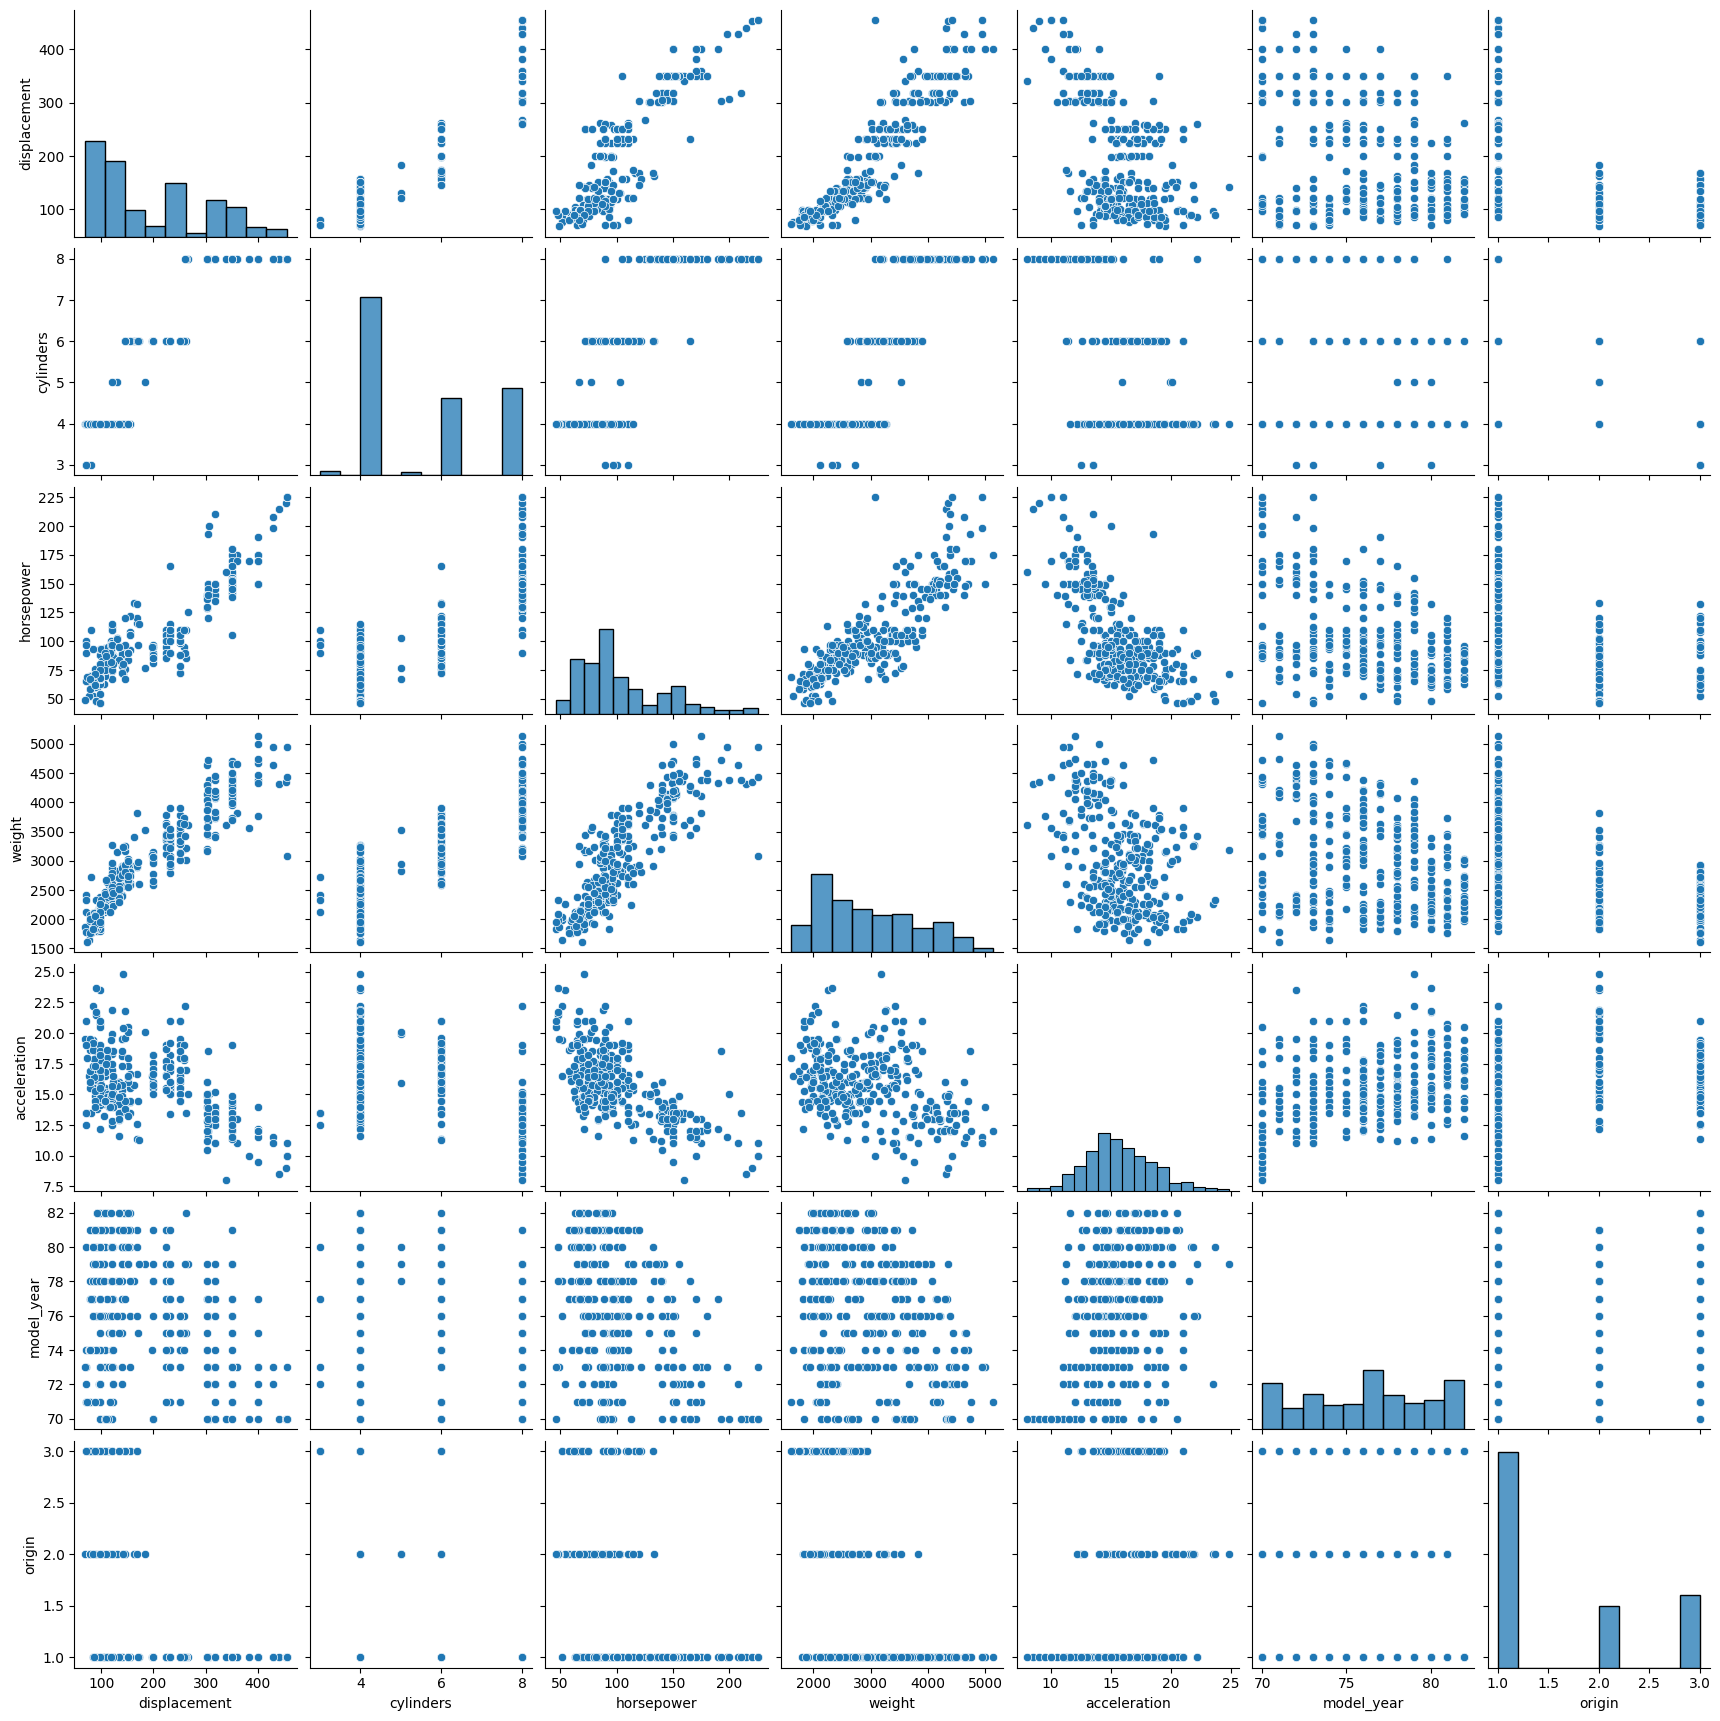

In [171]:
# Crear el parplot (pairplot) para la visualización de la distribución conjunta
sns.pairplot(df_train[feature_columns])

# Mostrar el gráfico
plt.show() 

Tambien revise las estadisticas generales:

In [172]:
# Estadísticas generales para variables numéricas
print("Estadísticas Generales:")
print(df_train.describe()) 

Estadísticas Generales:
       displacement   cylinders  horsepower       weight  acceleration  \
count    318.000000  318.000000  318.000000   318.000000    318.000000   
mean     191.904088    5.430818  103.130503  2969.015723     15.639937   
std      102.983802    1.684947   37.085324   840.617729      2.763269   
min       68.000000    3.000000   46.000000  1613.000000      8.000000   
25%       98.500000    4.000000   75.250000  2220.000000     13.900000   
50%      148.500000    4.000000   92.500000  2822.500000     15.500000   
75%      259.500000    6.000000  120.000000  3597.250000     17.300000   
max      455.000000    8.000000  225.000000  5140.000000     24.800000   

       model_year      origin         mpg  
count  318.000000  318.000000  318.000000  
mean    76.103774    1.591195   23.608176  
std      3.603177    0.811696    7.930574  
min     70.000000    1.000000    9.000000  
25%     73.000000    1.000000   17.500000  
50%     76.000000    1.000000   22.450000  
7

In [173]:
# Información general del DataFrame
print("\nInformación del DataFrame:")
print(df_train.info()) 


Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  318 non-null    float64
 1   cylinders     318 non-null    int64  
 2   horsepower    318 non-null    float64
 3   weight        318 non-null    int64  
 4   acceleration  318 non-null    float64
 5   model_year    318 non-null    int64  
 6   origin        318 non-null    int64  
 7   mpg           318 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 20.0 KB
None


### Separa las features del target

Separe el target de las features. 

In [174]:
# Suponiendo que 'df_train' es el DataFrame que contiene tus datos de entrenamiento

# Separar el target (variable objetivo) de las features
X_train = df_train.drop('mpg', axis=1)  # Features
y_train = df_train['mpg']  # Target 

In [175]:
# Mostrar los primeros registros para verificar
print("Primeros registros de las features (X_train):")
print(X_train.head()) 

Primeros registros de las features (X_train):
   displacement  cylinders  horsepower  weight  acceleration  model_year  \
0         304.0          8       150.0    3433          12.0          70   
1          97.0          4        88.0    2130          14.5          70   
2          91.0          4        68.0    2025          18.2          82   
3          91.0          4        60.0    1800          16.4          78   
4         115.0          4        95.0    2694          15.0          75   

   origin  
0       1  
1       3  
2       3  
3       3  
4       2  


In [176]:
print("\nPrimeros registros del target (y_train):")
print(y_train.head()) 


Primeros registros del target (y_train):
0    16.0
1    27.0
2    37.0
3    36.1
4    23.0
Name: mpg, dtype: float64


### Estandariza los datos

Es una buena práctica estandarizar funciones que utilizan diferentes escalas y rangos. Aunque el modelo podría converger sin estandarizar, dificulta el entrenamiento y hace que el modelo resultante dependa de la elección de las unidades utilizadas en la entrada.

In [177]:
from sklearn.preprocessing import StandardScaler

# Inicializar el escalador
scaler = StandardScaler() 

In [178]:
# Ajustar el escalador solo con las características de entrenamiento y transformarlas
X_train_scaled = scaler.fit_transform(X_train) 

In [179]:
# Convertir el array escalado a un DataFrame para facilitar la visualización
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns) 
X_train_scaled 

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,1.090196,1.527188,1.265821,0.552826,-1.319334,-1.696667,-0.729494
1,-0.922996,-0.850515,-0.408635,-0.999667,-0.413182,-1.696667,1.738368
2,-0.981350,-0.850515,-0.948782,-1.124772,0.927922,1.638975,1.738368
3,-0.981350,-0.850515,-1.164840,-1.392854,0.275493,0.527094,1.738368
4,-0.747936,-0.850515,-0.219583,-0.327675,-0.231952,-0.306816,0.504437
...,...,...,...,...,...,...,...
313,-1.185587,-1.444941,-0.165569,-0.761372,-0.775643,-1.140727,1.738368
314,1.537573,1.527188,2.076041,1.822940,-1.138103,-0.862757,-0.729494
315,-0.563150,-0.850515,-0.219583,-0.540949,-0.304444,0.527094,1.738368
316,-1.000801,-0.850515,-1.110826,-1.094985,0.601707,1.361005,1.738368


In [180]:
# Mostrar los primeros registros después de la estandarización
print("Primeros registros de las features estandarizadas (X_train_scaled):")
print(X_train_scaled.head()) 

Primeros registros de las features estandarizadas (X_train_scaled):
   displacement  cylinders  horsepower    weight  acceleration  model_year  \
0      1.090196   1.527188    1.265821  0.552826     -1.319334   -1.696667   
1     -0.922996  -0.850515   -0.408635 -0.999667     -0.413182   -1.696667   
2     -0.981350  -0.850515   -0.948782 -1.124772      0.927922    1.638975   
3     -0.981350  -0.850515   -1.164840 -1.392854      0.275493    0.527094   
4     -0.747936  -0.850515   -0.219583 -0.327675     -0.231952   -0.306816   

     origin  
0 -0.729494  
1  1.738368  
2  1.738368  
3  1.738368  
4  0.504437  


In [181]:
# También puedes verificar la media y la desviación estándar de las características estandarizadas
print("\nMedia después de la estandarización:")
print(X_train_scaled.mean())  


Media después de la estandarización:
displacement   -4.468822e-17
cylinders       1.508228e-16
horsepower      7.261836e-17
weight          2.401992e-16
acceleration   -1.396507e-16
model_year     -1.904835e-15
origin         -7.820439e-17
dtype: float64


In [182]:
print("\ndesviación estándar después de la estandarización:") 
print(X_train_scaled.std()) 


desviación estándar después de la estandarización:
displacement    1.001576
cylinders       1.001576
horsepower      1.001576
weight          1.001576
acceleration    1.001576
model_year      1.001576
origin          1.001576
dtype: float64


Estos datos estandarizados es lo que usaremos para entrenar el modelo.

## El modelo

### Construye el modelo

Construyamos nuestro modelo. Aquí, utilizaremos un modelo `secuencial` con dos capas ocultas densamente conectadas y una capa de salida que devuelve un único valor continuo.

Por tanto, tendrá tres capas. Una de entrada con activación relu. Otra hidden layer con activación relu y la de salida de regresión, que se compondrá de una única neurona. Pon las neuronas que consideres para las dos primeras capas.

Para el compile utiliza un loss='mse'.

optimizer = `tf.keras.optimizers.RMSprop(0.001)`

Y en metrics añade en una lista el `mae` y `mse`. 

In [183]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import RMSprop 

# Crear el modelo secuencial
model = Sequential([
    # Capa de entrada usando Input
    Input(shape=(X_train_scaled.shape[1],)),  # Definición de la forma de la entrada
    Dense(64, activation='relu'),  # Primer capa oculta con 64 neuronas
    Dense(32, activation='relu'),  # Segunda capa oculta con 32 neuronas
    Dense(1)  # Capa de salida con una neurona para regresión
]) 

In [184]:
# Compilar el modelo
model.compile(optimizer=RMSprop(0.001),
              loss='mse',
              metrics=['mae', 'mse']) 

### Inspeccione el modelo

Use el método `.summary` para imprimir una descripción simple del modelo 

In [185]:
# Imprimir el resumen del modelo
model.summary() 

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,625 (10.25 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

### Entrenar el modelo

Entrene el modelo para 1000 epochs y guarda los resultados del entrenamiento en una variable llamada `history`.
Emplea en el entrenamiento un 20% de los datos para validación, mediante el argumento `validation_split`.

NOTA: recuerda usar los datos normalizados. 

In [186]:
# Entrenar el modelo
history = model.fit(
    X_train_scaled,      # Datos de entrenamiento
    y_train,             # Target de entrenamiento
    epochs=1000,         # Número de épocas
    validation_split=0.2,  # Utilizar el 20% de los datos para validación
    verbose=1            # Mostrar el progreso del entrenamiento
)

# Puedes guardar el modelo si lo necesitas
# model.save('modelo_entrenado.h5') 

Epoch 1/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 590.6638 - mae: 23.0627 - mse: 590.6638 - val_loss: 566.8438 - val_mae: 22.5781 - val_mse: 566.8438
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 572.7801 - mae: 22.3931 - mse: 572.7801 - val_loss: 530.4277 - val_mae: 21.7410 - val_mse: 530.4277
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 525.0518 - mae: 21.5216 - mse: 525.0518 - val_loss: 492.2479 - val_mae: 20.8454 - val_mse: 492.2479
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 455.4531 - mae: 19.7656 - mse: 455.4531 - val_loss: 451.2741 - val_mae: 19.8485 - val_mse: 451.2741
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 413.7493 - mae: 18.6593 - mse: 413.7493 - val_loss: 408.0287 - val_mae: 18.7471 - val_mse: 408.0287
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 389.3236 - mae: 18.1198 - mse: 389.3236 - val_loss: 363.8069 - val_mae: 17.5466 - val_mse: 363.8069
Epoch 7/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step -

Visualice el progreso de entrenamiento del modelo usando las estadísticas almacenadas en el objeto `history`. 

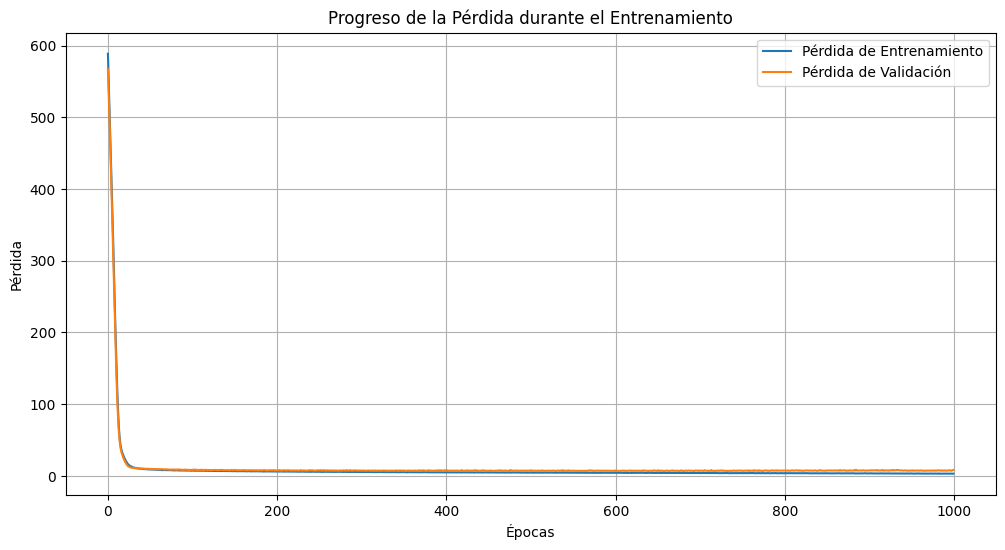

In [187]:
import matplotlib.pyplot as plt

# Gráfico de la pérdida de entrenamiento y validación
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Progreso de la Pérdida durante el Entrenamiento')
plt.legend()
plt.grid(True)
plt.show() 

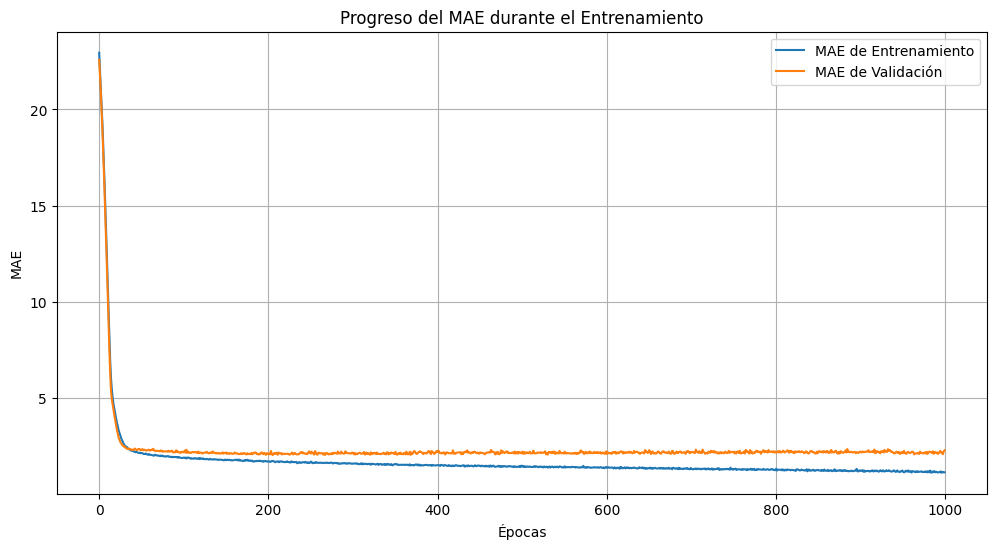

In [188]:
# Gráfico del error absoluto medio (MAE) de entrenamiento y validación
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='MAE de Entrenamiento')
plt.plot(history.history['val_mae'], label='MAE de Validación')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.title('Progreso del MAE durante el Entrenamiento')
plt.legend()
plt.grid(True)
plt.show()

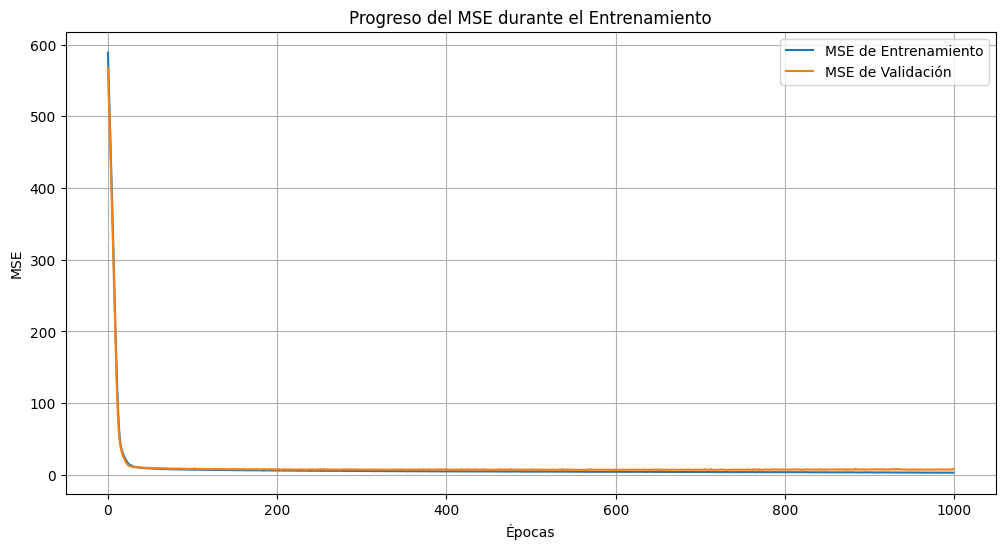

In [189]:
# Gráfico del error cuadrático medio (MSE) de entrenamiento y validación
plt.figure(figsize=(12, 6))
plt.plot(history.history['mse'], label='MSE de Entrenamiento')
plt.plot(history.history['val_mse'], label='MSE de Validación')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.title('Progreso del MSE durante el Entrenamiento')
plt.legend()
plt.grid(True)
plt.show() 

¿Alguna conclusión respecto a este gráfico?

Earlystopping me ha ayudado a detener el entrenamiento para no caer en overfitting, también para ahorrar recursos innecesarios.

Observamos que si le damos muchas epochs al entrenamiento tiende a un overfitting, siendo el error en validación cada vez más alto. Sería interesante utilizar un número aprox de 30 epochs

Añade un early stopping al modelo. Pon el argumento `callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]` dentro del fit().

Visualiza el progreso de entrenamiento.

In [190]:
import tensorflow as tf
from tensorflow import keras

# Definir el callback de EarlyStopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    restore_best_weights=True
) 

In [191]:
# Entrenar el modelo
history = model.fit(
    X_train, 
    y_train, 
    epochs=1000, 
    validation_split=0.2, 
    callbacks=[early_stopping]
) 

Epoch 1/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 50429344.0000 - mae: 6742.2983 - mse: 50429344.0000 - val_loss: 17349658.0000 - val_mae: 4014.3423 - val_mse: 17349658.0000
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 16223533.0000 - mae: 3823.7886 - mse: 16223533.0000 - val_loss: 5604712.0000 - val_mae: 2282.8459 - val_mse: 5604712.0000
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4670810.0000 - mae: 2062.2476 - mse: 4670810.0000 - val_loss: 1418174.5000 - val_mae: 1139.8613 - val_mse: 1418174.5000
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1102265.6250 - mae: 1001.5837 - mse: 1102265.6250 - val_loss: 252974.6562 - val_mae: 471.1342 - val_mse: 252974.6562
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 190844.3438 - mae: 394.2668 - mse: 190844.3438 - val_loss: 42893.2891 - val_mae: 164.9969 - val_mse: 42893.2891
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 27457.6602 - mae: 131.5661 - mse: 27457.6602 - val_loss:

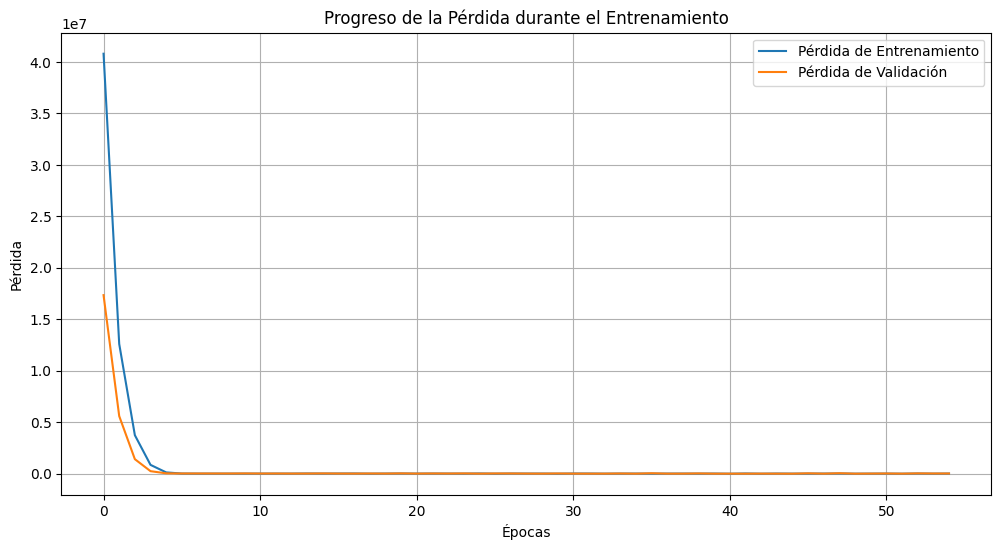

In [192]:
# Visualizar el progreso de entrenamiento
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Progreso de la Pérdida durante el Entrenamiento')
plt.legend()
plt.grid(True)
plt.show() 

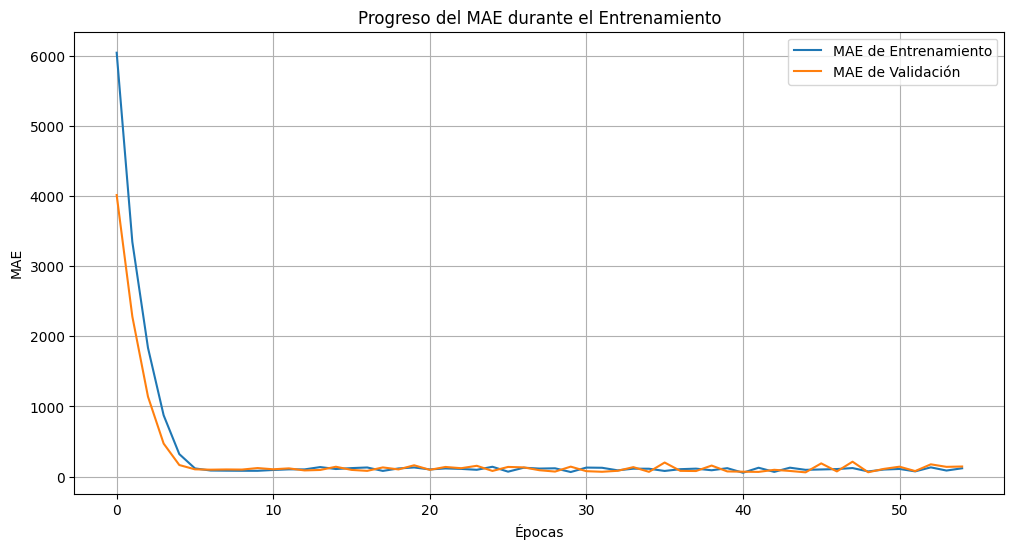

In [193]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='MAE de Entrenamiento')
plt.plot(history.history['val_mae'], label='MAE de Validación')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.title('Progreso del MAE durante el Entrenamiento')
plt.legend()
plt.grid(True)
plt.show()

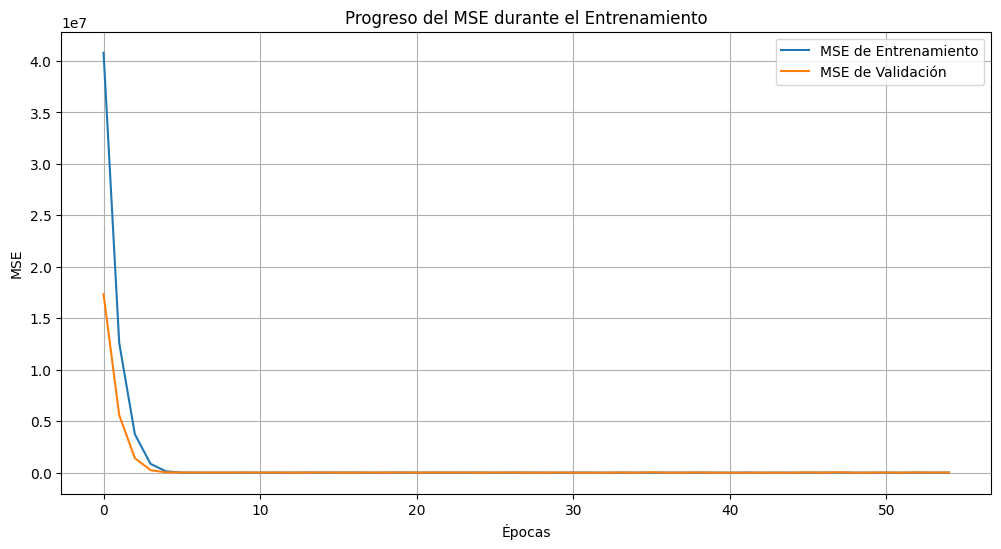

In [194]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['mse'], label='MSE de Entrenamiento')
plt.plot(history.history['val_mse'], label='MSE de Validación')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.title('Progreso del MSE durante el Entrenamiento')
plt.legend()
plt.grid(True)
plt.show()


Interpreta el gráfico

In [120]:
'''Los gráficos del progreso de entrenamiento muestran cómo la pérdida, MAE y MSE cambian durante el entrenamiento tanto en el conjunto de
 entrenamiento como en el de validación. Aquí hay algunas cosas que puedes buscar:

- Convergencia: La pérdida y las métricas deberían disminuir con el tiempo, lo que indica que el modelo está aprendiendo.

- Sobreajuste: Si la pérdida de validación empieza a aumentar mientras que la pérdida de entrenamiento sigue disminuyendo, podría ser una
señal de sobreajuste. El EarlyStopping debería ayudar a mitigar esto.

- Patience: El EarlyStopping detiene el entrenamiento cuando no hay mejora en la pérdida de validación durante el número de épocas definido
en patience. Esto ayuda a evitar un entrenamiento excesivo.'''

'Los gráficos del progreso de entrenamiento muestran cómo la pérdida, MAE y MSE cambian durante el entrenamiento tanto en el conjunto de\n entrenamiento como en el de validación. Aquí hay algunas cosas que puedes buscar:\n\n- Convergencia: La pérdida y las métricas deberían disminuir con el tiempo, lo que indica que el modelo está aprendiendo.\n\n- Sobreajuste: Si la pérdida de validación empieza a aumentar mientras que la pérdida de entrenamiento sigue disminuyendo, podría ser una\nseñal de sobreajuste. El EarlyStopping debería ayudar a mitigar esto.\n\n- Patience: El EarlyStopping detiene el entrenamiento cuando no hay mejora en la pérdida de validación durante el número de épocas definido\nen patience. Esto ayuda a evitar un entrenamiento excesivo.'

Veamos qué tan bien generaliza el modelo al usar el conjunto de **test**. Esto nos dice qué tan bien podemos esperar que el modelo prediga cuándo lo usamos en el mundo real. Utiliza el método `evaluate` con los datos de test normalizados y sus labels.

Con el método evaluate devolverá tres valores: loss, mae y mse.

In [195]:
# Evaluar el modelo con los datos de test
test_loss, test_mae, test_mse = model.evaluate(X_test, y_test, verbose=1)

print(f'Pérdida en Test: {test_loss}')
print(f'MAE en Test: {test_mae}')
print(f'MSE en Test: {test_mse}') 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4040.7964 - mae: 49.7737 - mse: 4040.7964 
Pérdida en Test: 3850.91552734375
MAE en Test: 48.703514099121094
MSE en Test: 3850.91552734375


Ahora prueba el modelo. Coge 10 ejemplos de test y llama a` model.predict`.

In [205]:
import matplotlib.pyplot as plt
import numpy as np

# Seleccionar 10 ejemplos del conjunto de prueba
sample_indices = np.random.choice(X_test.shape[0], 10, replace=False)
X_sample = X_test.iloc[sample_indices]  # Obtener los ejemplos de test
y_sample = y_test.iloc[sample_indices]  # Obtener las etiquetas correspondientes

In [206]:
# Utilizar .iloc para seleccionar las filas por índice
X_sample = X_test.iloc[sample_indices]
y_sample = y_test.iloc[sample_indices] 

X_sample  

name,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
394,97.0,4,52.0,2130,24.6,82,2
77,121.0,4,76.0,2511,18.0,72,2
93,318.0,8,150.0,4237,14.5,73,1
30,140.0,4,90.0,2264,15.5,71,1
42,383.0,8,180.0,4955,11.5,71,1
393,140.0,4,86.0,2790,15.6,82,1
312,86.0,4,65.0,2019,16.4,80,3
341,173.0,6,110.0,2725,12.6,81,1
337,107.0,4,72.0,2290,17.0,80,3
55,97.0,4,60.0,1834,19.0,71,2


In [207]:
y_sample 

name,mpg
394,44.0
77,22.0
93,14.0
30,28.0
42,12.0
393,27.0
312,37.2
341,23.5
337,32.4
55,27.0


In [208]:
# Realizar predicciones
predictions = model.predict(X_sample) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [209]:
# Si y_test y predictions están normalizados, desnormalizar (este paso depende de si usaste normalización)

from sklearn.preprocessing import StandardScaler

# Inicializar el escalador
scaler = StandardScaler()

# Ajustar y transformar el conjunto de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Transformar el conjunto de prueba (utilizando el mismo escalador)
X_test_scaled = scaler.transform(X_test)

In [212]:
# Convertir las series de pandas a arrays
y_sample_array = np.array(y_sample).flatten()
predictions_array = np.array(predictions).flatten()
y_sample_array, predictions_array 

(array([44. , 22. , 14. , 28. , 12. , 27. , 37.2, 23.5, 32.4, 27. ]),
 array([ 51.57917 ,  66.157234,  65.435005, -40.23739 , 138.18268 ,
         72.9448  ,  21.065773, -40.234764,  38.73539 , -10.040504],
       dtype=float32))

### Haz Predicciones

Dibuja en un scatter plot las predicciones de test vs sus true labels. 

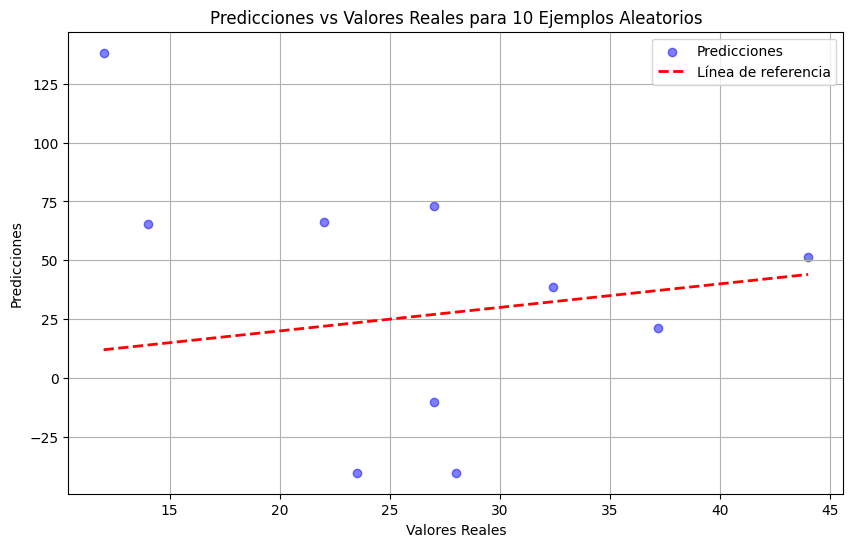

In [211]:
# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(y_sample_array, predictions_array, alpha=0.5, label='Predicciones', color='blue')
plt.plot([min(y_sample_array), max(y_sample_array)], [min(y_sample_array), max(y_sample_array)], 'r--', lw=2, label='Línea de referencia')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales para 10 Ejemplos Aleatorios')
plt.legend()
plt.grid(True)
plt.show() 

Parece que nuestro modelo predice razonablemente bien. Echemos un vistazo a la distribución de errores.

Representa los residuos en un histograma

In [214]:
import numpy as np
import matplotlib.pyplot as plt

# Realizar predicciones con datos normalizados
predictions_scaled = model.predict(X_test_scaled) 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


In [217]:
# Desnormalizar las predicciones
predictions = predictions_scaled.flatten()

In [220]:
# Convertir y_test a un array unidimensional si es un DataFrame
y_test_array = np.array(y_test).flatten() 

In [222]:
# Calcular los residuos
residuals = y_test_array - predictions
residuals  

array([ 3.58879852,  7.9885025 , -1.59787941,  4.41150856,  8.03135204,
        5.3234024 ,  6.16393852,  7.71518993, 12.0268364 ,  7.92921925,
        6.14715672,  5.52297211,  9.69071198,  4.60787964,  9.20695877,
        5.1151762 ,  9.41275406,  0.49687576,  9.01955891, -1.00104523,
        4.20692253,  6.70897579, -6.82224274,  9.15768814,  4.52049446,
        7.42889404,  5.39353943,  7.01982117,  3.7284771 ,  6.40203285,
        7.30935478,  1.88097382, 17.00225258,  3.55902863,  7.53866501,
        7.92435455, -2.08731079,  5.02996559,  9.85857868,  7.31646729,
        3.3586319 ,  5.598032  ,  0.18135452,  8.05253923,  4.05195236,
        5.07107353,  4.01647377,  5.77850342,  6.08005142,  1.55696106,
        8.7375164 ,  4.58674011,  4.45821609,  7.09776831, -1.33982849,
        5.99603844,  7.7539196 ,  4.52062111,  9.35219002,  5.95107937,
        3.88829517,  4.23069382,  6.45661163,  7.7710638 ,  8.8815794 ,
        3.76719666,  8.60376816,  5.29112854,  7.99217606,  4.04

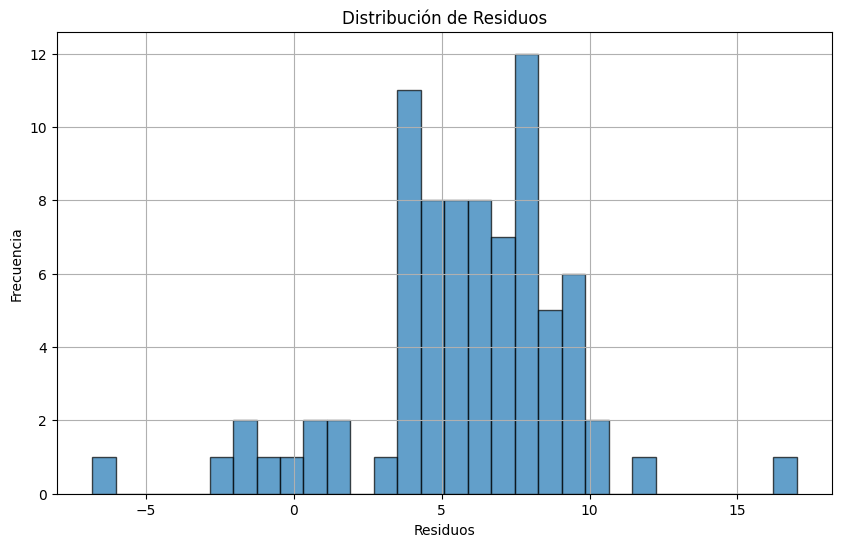

In [223]:
# Crear el histograma de residuos
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Distribución de Residuos')
plt.grid(True)
plt.show() 

No es del todo gaussiano, pero podríamos esperar eso porque el número de muestras es muy pequeño.

Guarda tu modelo en un archivo.

In [225]:
# Guardar el modelo en formato Keras
model.save('auto_mpg_model.keras')  # 'auto_mpg_model.keras' es el nombre del archivo

print("Modelo guardado en 'auto_mpg_model.keras'") 

Modelo guardado en 'auto_mpg_model.keras'


In [ ]:
''' Para cargar el modelo desde un archivo .keras, usa el siguiente código: 

from tensorflow.keras.models import load_model

# Cargar el modelo
loaded_model = load_model('auto_mpg_model.keras')''' 